In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')

df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


**Проанализируем данные**

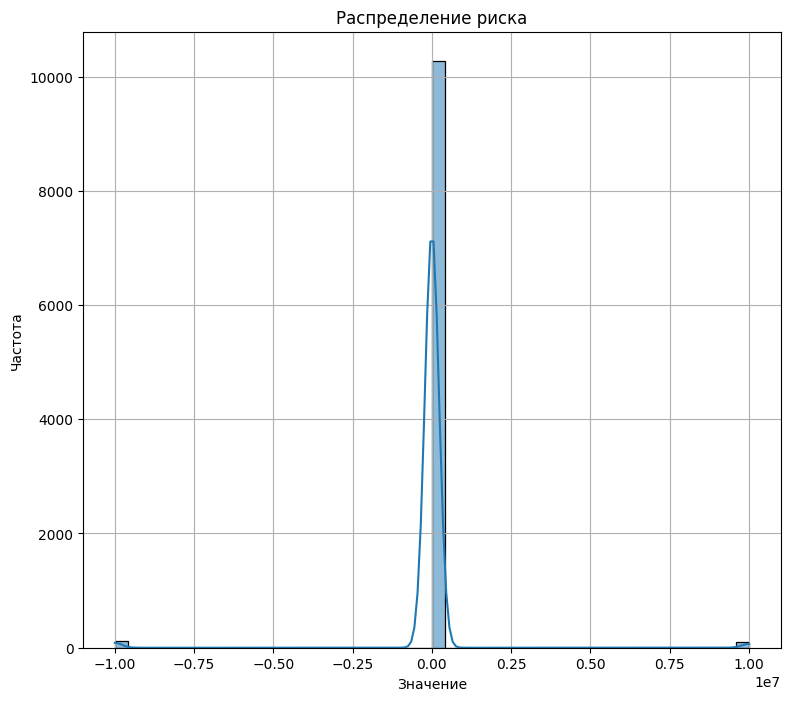

In [85]:

plt.figure(figsize=(9, 8))
sns.histplot(data=df, x='RiskScore', bins=50, kde=True)
plt.title('Распределение риска')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [86]:
max_risk = df['RiskScore'].max()
min_risk = df['RiskScore'].min()
len(df[df['RiskScore'] > 100]) == len(df[df['RiskScore'] == max_risk])
len(df[df['RiskScore'] < -100]) == len(df[df['RiskScore'] == min_risk])


True

In [87]:
len(df[df['RiskScore'] < -100]) == len(df[df['RiskScore'] == min_risk])

True

Очевидно, что данные за пределом диапазона (-100, 100) являются выбросами, можно их не учитывать

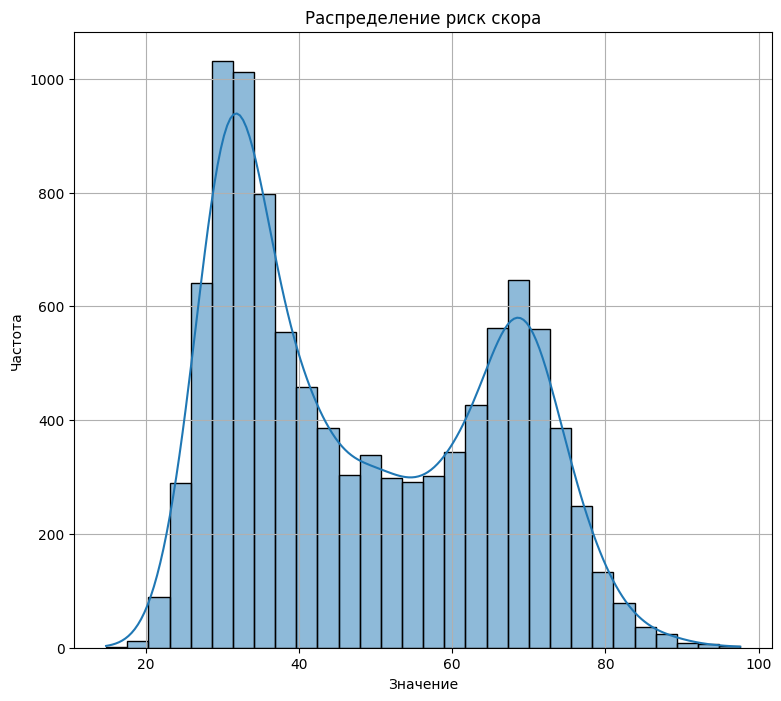

In [88]:
df = df[df['RiskScore'] >= -100]
df = df[df['RiskScore'] <= 100]

plt.figure(figsize=(9, 8))
sns.histplot(data=df, x='RiskScore', bins=30, kde=True)
plt.title('Распределение риск скора')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Проверим пустые значения** 

In [89]:
none_values = df.isna().sum()
none_percent = (none_values / len(df)) * 100
#процент пустых значений по столбцам
print(none_percent)

ApplicationDate               0.000000
Age                           0.000000
AnnualIncome                  0.000000
CreditScore                   4.721573
LoanAmount                    4.721573
LoanDuration                  0.000000
MaritalStatus                 0.000000
NumberOfDependents            0.000000
HomeOwnershipStatus           0.000000
MonthlyDebtPayments           4.721573
CreditCardUtilizationRate     0.000000
NumberOfOpenCreditLines       0.000000
NumberOfCreditInquiries       0.000000
DebtToIncomeRatio             0.000000
BankruptcyHistory             4.721573
LoanPurpose                   4.721573
PreviousLoanDefaults          0.000000
PaymentHistory                0.000000
LengthOfCreditHistory         0.000000
SavingsAccountBalance         0.000000
CheckingAccountBalance        4.721573
TotalAssets                   4.721573
TotalLiabilities              0.000000
MonthlyIncome                 0.000000
UtilityBillsPaymentHistory    0.000000
JobTenure                

Результаты показывают что пустые элементы содержат только числовые значения(кроме loanpurpose - удалим строки с пустым loanpurpose), заменим их медианой)

In [90]:
df = df.dropna(subset=['LoanPurpose'])

columns_to_fill = [
    'CreditScore', 
    'LoanAmount', 
    'MonthlyDebtPayments', 
    'BankruptcyHistory', 
    'CheckingAccountBalance', 
    'TotalAssets', 
    'NetWorth', 
    'BaseInterestRate'
]

for column in columns_to_fill:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

In [91]:
df.describe()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,...,9787.000000,9787.000000,9787.000000,9.787000e+03,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000
mean,39.898743,131527.784510,677.911515,29925.122509,53.439052,1.568714,546.437928,0.284935,3.029733,0.976704,...,0.784073,4.938694,17.671299,1.536230e+05,0.200502,0.200155,1079.984544,0.519815,0.512108,48.349800
std,11.606484,116069.069481,175.374136,27812.837524,24.487196,1.416543,502.599753,0.159821,1.740653,0.986558,...,0.123399,2.202112,11.336445,4.613971e+05,0.094560,0.096607,1355.683134,0.899259,0.499879,17.255990
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,0.000000,14.841417
25%,32.000000,20699.500000,550.000000,12656.000000,36.000000,0.000000,233.000000,0.159490,2.000000,0.000000,...,0.707881,3.000000,9.000000,7.253000e+03,0.119862,0.119548,374.944006,0.066858,0.000000,32.699940
50%,40.000000,88615.000000,722.000000,21836.000000,48.000000,1.000000,398.000000,0.262798,3.000000,1.000000,...,0.803716,5.000000,17.000000,2.724500e+04,0.182072,0.180496,685.742578,0.178283,1.000000,44.151002
75%,48.000000,257780.500000,850.000000,37289.500000,60.000000,3.000000,683.500000,0.391759,4.000000,2.000000,...,0.878835,6.000000,26.000000,1.239920e+05,0.265098,0.265152,1285.051520,0.641459,1.000000,65.122034
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000,97.597249


**Посмотрим на зависимость риск скора от некоторых числовых параметров**

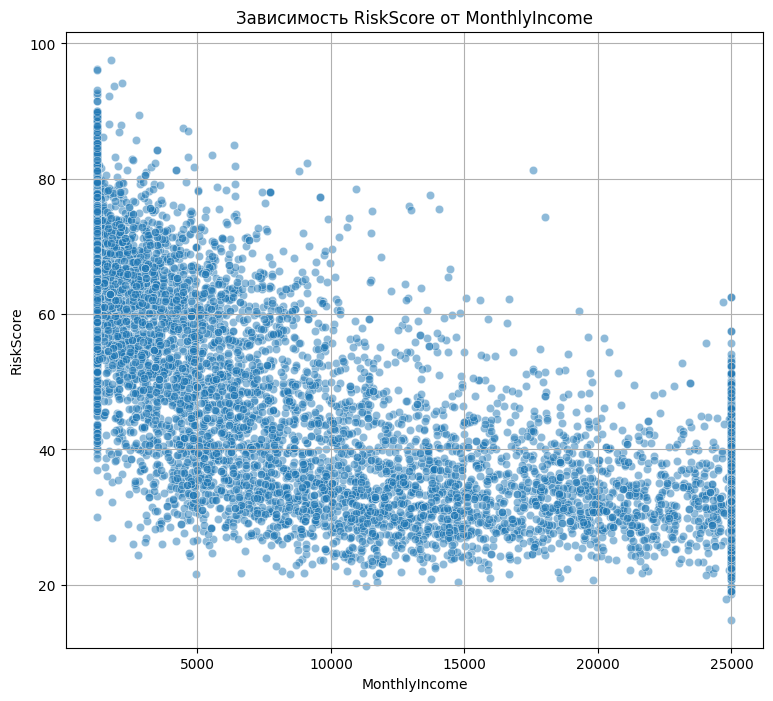

In [92]:

plt.figure(figsize=(9, 8))
sns.scatterplot(x='MonthlyIncome', y='RiskScore', data=df, alpha=0.5)
plt.title('Зависимость RiskScore от MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('RiskScore')
plt.grid(True)
plt.show()

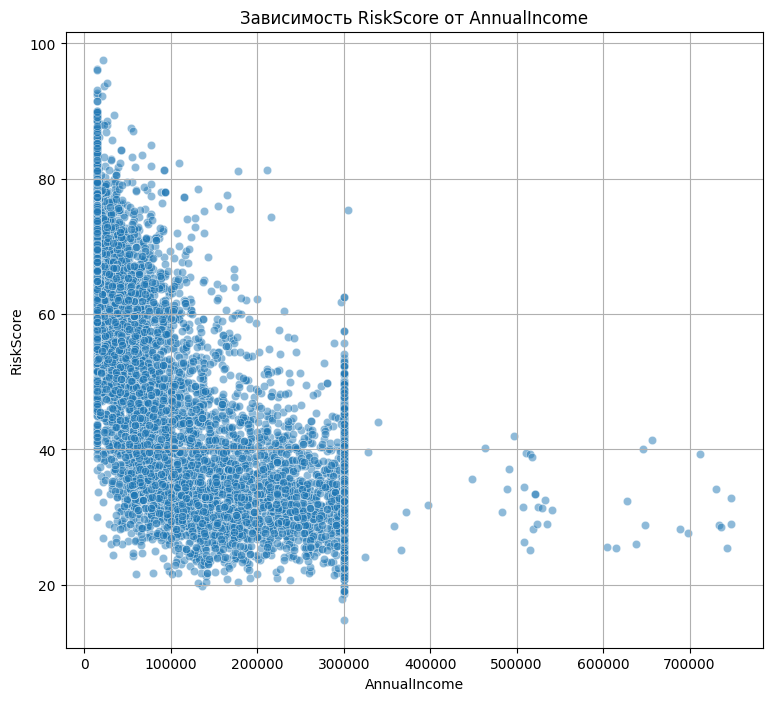

In [93]:
plt.figure(figsize=(9, 8))
sns.scatterplot(x='AnnualIncome', y='RiskScore', data=df, alpha=0.5)
plt.title('Зависимость RiskScore от AnnualIncome')
plt.xlabel('AnnualIncome')
plt.ylabel('RiskScore')
plt.grid(True)
plt.show()

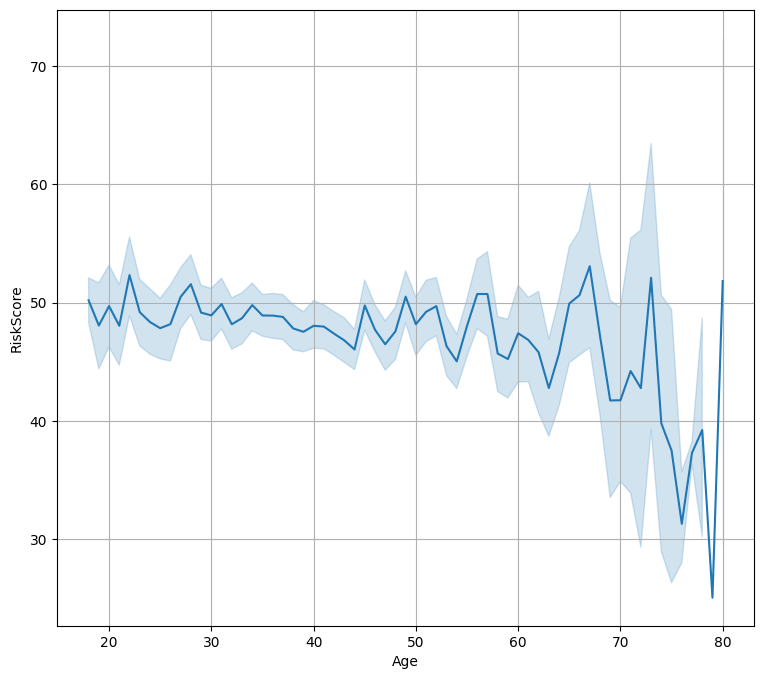

In [94]:
plt.figure(figsize=(9, 8))
sns.lineplot(
    x='Age', 
    y='RiskScore', 
    data=df, 
    estimator='mean',  # усреднение по Age
)
plt.grid(True)
plt.show()

Заметим остутвие корреляции между возрастом и показателем риска, скачок к 80 годам можно списать на малую выборку для этого возраста

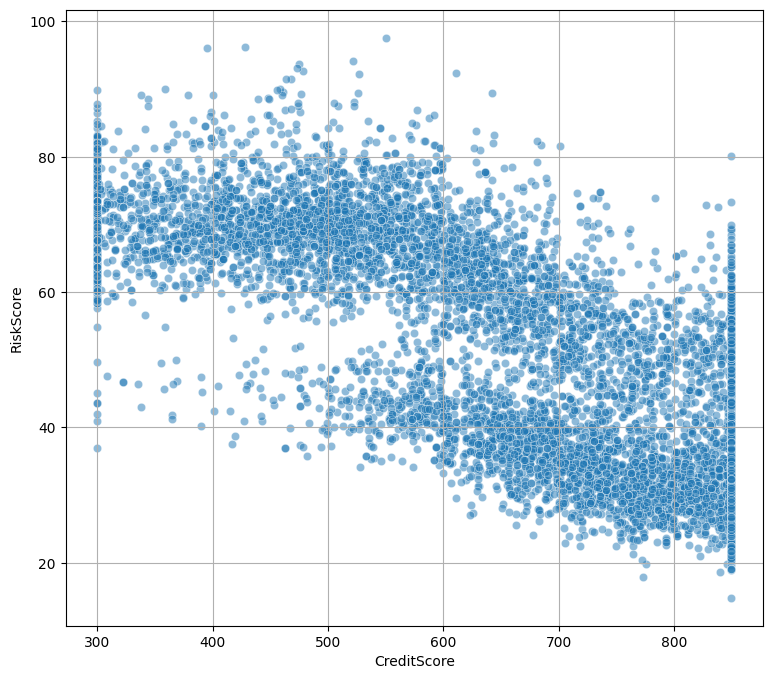

In [95]:
plt.figure(figsize=(9, 8))
sns.scatterplot(x='CreditScore', y='RiskScore', data=df, alpha=0.5)
plt.grid(True)
plt.show()

Очевидна корреляция между риск скором и оценкой кредитоспособности

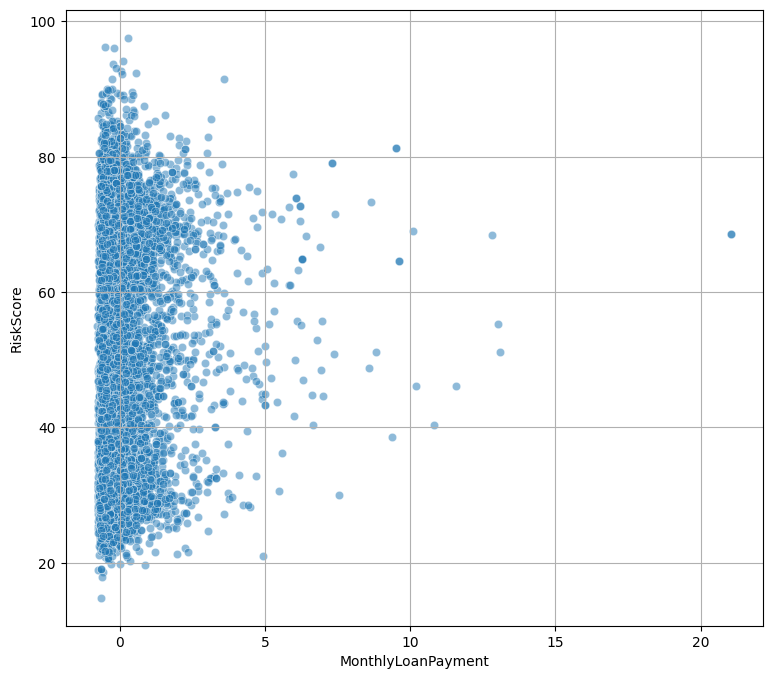

In [134]:
plt.figure(figsize=(9, 8))
sns.scatterplot(x='MonthlyLoanPayment', y='RiskScore', data=df, alpha=0.5)
plt.grid(True)
plt.show()

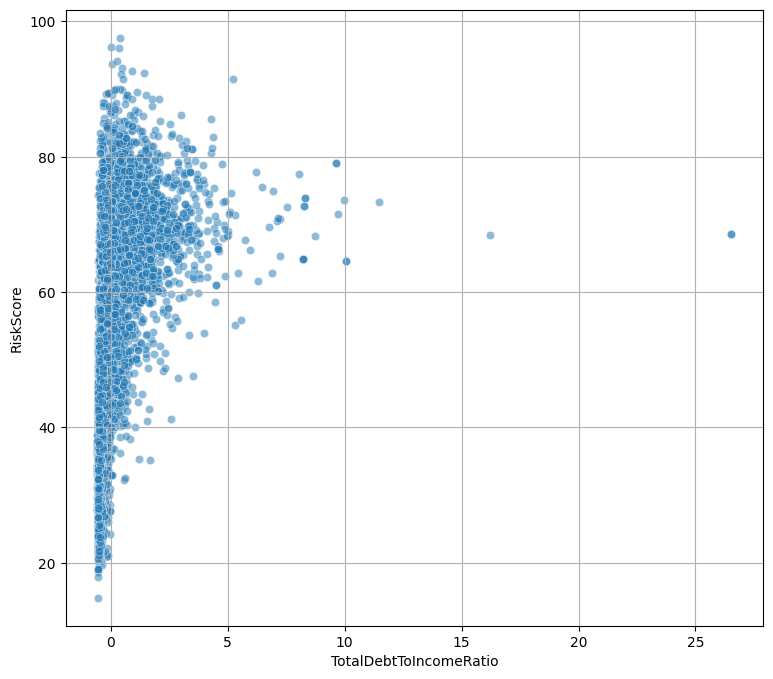

In [135]:
plt.figure(figsize=(9, 8))
sns.scatterplot(x='TotalDebtToIncomeRatio', y='RiskScore', data=df, alpha=0.5)
plt.grid(True)
plt.show()

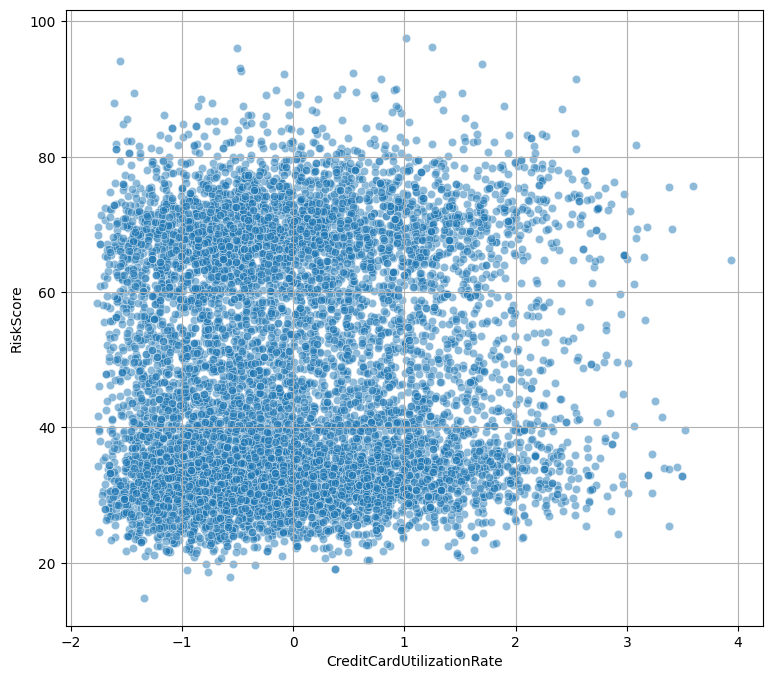

In [136]:
plt.figure(figsize=(9, 8))
sns.scatterplot(x='CreditCardUtilizationRate', y='RiskScore', data=df, alpha=0.5)
plt.grid(True)
plt.show()

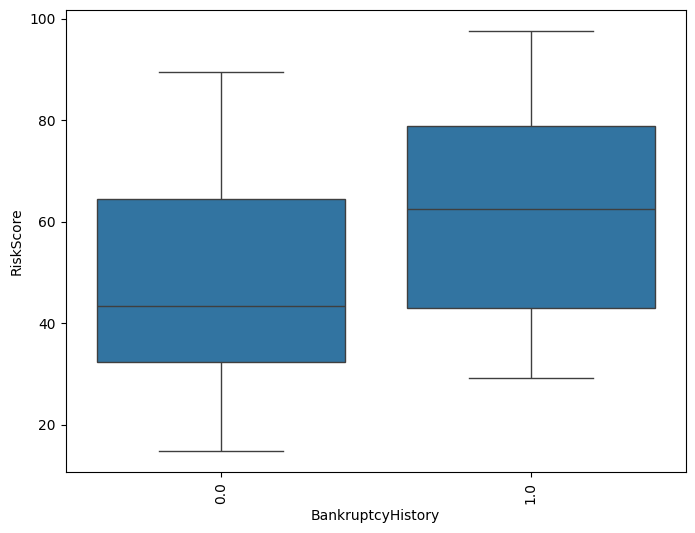

In [96]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='BankruptcyHistory', y='RiskScore', data=df)
plt.xticks(rotation=90)
plt.show()

Случаи банкротства сильно повышают риск скор

**Построим матрицу корреляций**

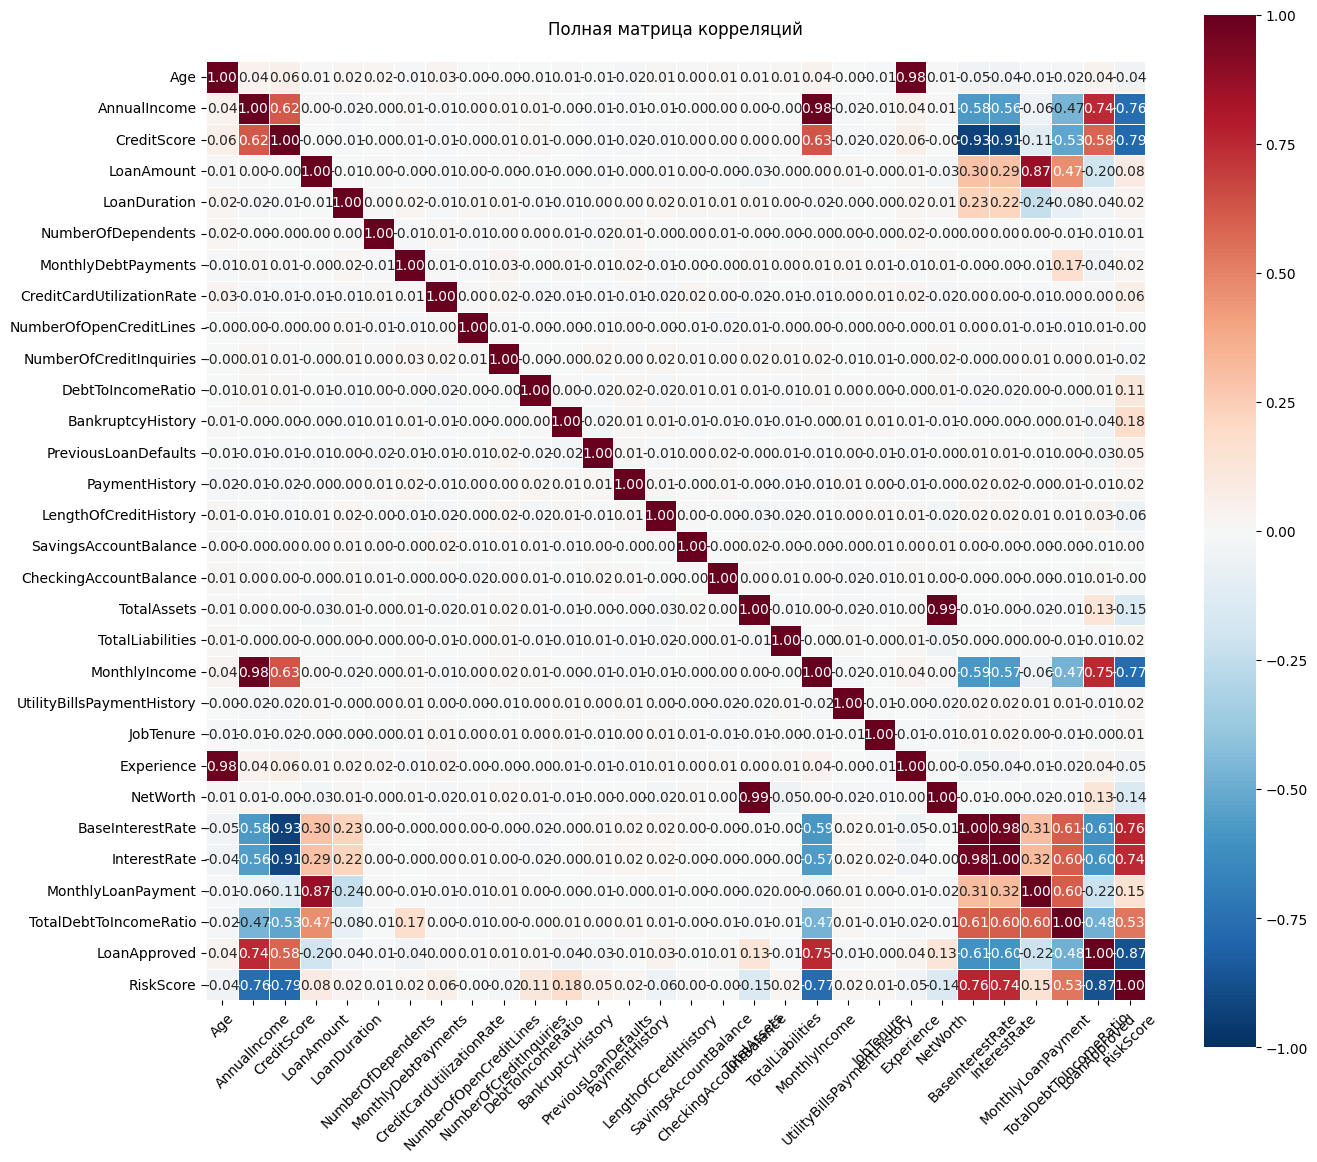

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['number']).columns  # Выбираем только числовые колонки

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix, 
    annot=True,          
    fmt=".2f",          
    cmap='RdBu_r',      
    vmin=-1, vmax=1,    
    center=0,          
    linewidths=.5,      
    square=True         
)
plt.title('Полная матрица корреляций', pad=20)
plt.xticks(rotation=45)  
plt.yticks(rotation=0)   
plt.tight_layout()       
plt.show()

По матрице корреляций заметны основные зависимости

**Поменяем категоривальные признаки на числовые используя One-hot encoding**

In [98]:
my_colums = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']
df = pd.get_dummies(df, columns=my_colums, prefix=my_colums)

In [99]:
print(df.head())

  ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      2010-06-26  27.0       66829.0        549.0     17290.0          60.0   
1      1996-09-23  55.0      172147.0        850.0     16110.0          36.0   
2      2015-01-19  51.0      300000.0        850.0     38436.0          36.0   
3      1981-05-12  25.0       34683.0        847.0     19186.0          48.0   
4      1995-05-07  55.0      300000.0        850.0     30437.0          48.0   

   NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0                 1.0               1095.0                   0.151985   
1                 1.0                211.0                   0.175693   
2                 0.0                546.0                   0.444605   
3                 0.0                153.0                   0.188452   
4                 2.0                562.0                   0.273431   

   NumberOfOpenCreditLines  ...  LoanPurpose_Home  LoanPurpose_Other  \
0       

In [100]:
#Реализация нормализации z-score и min-max
class Normalization:
    
    @staticmethod
    def z_score(X):
        return (X - np.mean(X)) / np.std(X)
    
    @staticmethod
    def min_max_scaling(X):
        return (X - np.min(X)) / (np.max(X) - np.min(X))
        

In [101]:
df = df.drop('ApplicationDate', axis=1)

cols = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
                         'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'PaymentHistory',
                         'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome',
                         'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
                         'TotalDebtToIncomeRatio']
for col in cols:
    df[col] = Normalization.z_score(df[col])

In [102]:
print(np.max(df, axis=0))

Age                                 3.45525
AnnualIncome                       5.315901
CreditScore                        0.981315
LoanAmount                        13.989646
LoanDuration                       2.718333
NumberOfDependents                 3.128399
MonthlyDebtPayments               20.559282
CreditCardUtilizationRate          3.940236
NumberOfOpenCreditLines            5.153654
NumberOfCreditInquiries            5.091998
DebtToIncomeRatio                  4.264849
BankruptcyHistory                       1.0
PreviousLoanDefaults                    1.0
PaymentHistory                     4.122026
LengthOfCreditHistory              1.658255
SavingsAccountBalance             25.494553
CheckingAccountBalance            35.007666
TotalAssets                       23.806761
TotalLiabilities                  44.365029
MonthlyIncome                      1.507527
UtilityBillsPaymentHistory         1.722147
JobTenure                          5.477434
Experience                      

In [103]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RiskScore']) 
y = df['RiskScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

skmodel = Lasso(alpha=0.3)
skmodel.fit(X_train, y_train)
y_pred = skmodel.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Коэффициенты модели: {skmodel.coef_}")

MSE: 22.901572391140853
Коэффициенты модели: [  0.          -0.11324216  -6.84814576  -0.04380409   0.
   0.          -0.           0.52294043   0.          -0.
   1.82902452   5.94564451   0.           0.          -0.49765418
  -0.           0.          -1.11192188   0.          -2.00976177
   0.           0.           0.          -0.           0.
   0.          -0.           0.16046492 -17.28196786  -0.
   0.           0.          -0.          -0.          -0.
   0.           0.           0.          -0.           0.
  -0.           0.          -0.18422117   0.           0.
   0.           0.           0.          -0.           0.        ]


**Реализация класса линейной регресии**

In [104]:
class LinearRegression:

    class LossAndDerivatives:

        @staticmethod
        def mse(X, Y, w, b):
            return np.mean((X.dot(w) + b - Y) ** 2)

        @staticmethod
        def mae(X, Y, w, b):
            return np.mean(np.abs(X.dot(w) + b - Y))

        @staticmethod
        def r2_score(X, Y, w, b):
            return 1 - np.sum((X.dot(w) + b - Y) ** 2) / np.sum((np.mean(Y) - Y) ** 2)

        @staticmethod
        def mape(X, Y, w, b):
            return np.mean(np.abs(X.dot(w) + b - Y) / np.abs(Y))

        @staticmethod
        def l2_reg(w):
            return np.sum(w ** 2)

        @staticmethod
        def l1_reg(w):
            return np.sum(np.abs(w))
        
        @staticmethod
        def lp_reg(w, p):
            return np.sum(np.abs(w) ** p) ** (1 / p)

        @staticmethod
        def no_reg(w):
            return 0.0

        @staticmethod
        def mse_derivative(X, Y, w, b):
            error = X.dot(w) + b - Y
            dw = (2 / X.shape[0]) * X.T.dot(error)
            db = (2 / X.shape[0]) * np.sum(error)
            return dw, db

        @staticmethod
        def mae_derivative(X, Y, w, b):
            error = X.dot(w) + b - Y
            dw = (1 / X.shape[0]) * X.T.dot(np.sign(error))
            db = (1 / X.shape[0]) * np.sum(np.sign(error))
            return dw, db

        @staticmethod
        def l2_reg_derivative(w):
            return 2 * w

        @staticmethod
        def l1_reg_derivative(w):
            return np.sign(w)

        @staticmethod
        def lp_reg_derivative(w, p):
            return p * np.sign(w) * (np.abs(w)) ** (p - 1)

        @staticmethod
        def no_reg_derivative(w):
            return np.zeros_like(w)

        
    class LRAnalytical:

        def __init__(self, reg = None, alpha = 0.01):
            self.reg = reg
            self.alpha = alpha
            self.weights = None
            self.bias = 0.0

        def fit(self, X, Y):
            X = np.insert(X, 0, 1, axis=1)
            X_T_X = X.T @ X
            if self.reg == "l2":
                X_T_X += self.alpha * np.eye(X_T_X.shape[0])
            inverse = np.linalg.pinv(X_T_X)
            w = inverse @ X.T @ Y
            self.bias = w[0]
            self.weights = w[1:]

        def predict(self, X):
            return X @ self.weights + self.bias


**Реализация k-fold и leave-one-out**

In [105]:
class CrossValidation:
    
    @staticmethod
    def kfold_cross_validation(X, y, model, k=5, random_state=None):
        """K-Fold cross-validation with metrics calculation"""
        if random_state is not None:
            np.random.seed(random_state)
            
        n_samples = len(y)
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        
        fold_size = n_samples // k
        metrics = {
            'mse': [],
            'r2': [],
            'mae': []
        }
        
        for fold in range(k):
            test_start = fold * fold_size
            test_end = (fold + 1) * fold_size if fold < k - 1 else n_samples
            
            test_idx = indices[test_start:test_end]
            train_idx = np.concatenate([indices[:test_start], 
                                       indices[test_end:]])
            
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            
            # Metric calculations
            mse = np.mean((y_test - preds)**2)
            mae = np.mean(np.abs(y_test - preds))
            ss_res = np.sum((y_test - preds)**2)
            ss_tot = np.sum((y_test - np.mean(y_train))**2)
            r2 = 1 - (ss_res / (ss_tot + 1e-10))
            
            metrics['mse'].append(mse)
            metrics['r2'].append(r2)
            metrics['mae'].append(mae)
            
        return {
            metric: (np.mean(values), np.std(values))
            for metric, values in metrics.items()
        }

    @staticmethod
    def loo_cross_validation(X, y, model):
        """Leave-One-Out cross-validation"""
        n = len(y)
        metrics = {
            'mse': [],
            'mae': []
        }
        
        for i in range(n):
            X_train = np.delete(X, i, axis=0)
            y_train = np.delete(y, i)
            X_test = X[i:i+1]
            y_test = y[i]
            
            model.fit(X_train, y_train)
            pred = model.predict(X_test)[0]
            
            metrics['mse'].append((y_test - pred)**2)
            metrics['mae'].append(abs(y_test - pred))
            
        return {
            metric: (np.mean(values), np.std(values))
            for metric, values in metrics.items()
        }

In [106]:
coefs = skmodel.coef_
feature_names = X.columns
important_features = feature_names[coefs != 0]
important_features

Index(['AnnualIncome', 'CreditScore', 'LoanAmount',
       'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LengthOfCreditHistory', 'TotalAssets', 'MonthlyIncome',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'EmploymentStatus_Employed'],
      dtype='object')

In [107]:
X = df[important_features]

In [108]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
df_poly = poly.fit_transform(X)

print(f"Количество признаков до полиномизации: {X.shape[1]}")
print(f"Количество признаков после полиномизации: {df_poly.shape[1]}")

Количество признаков до полиномизации: 12
Количество признаков после полиномизации: 90


In [121]:

X_train, X_test, y_train, y_test = train_test_split(df_poly, y, test_size=0.2, random_state=42)

model = LinearRegression.LRAnalytical(reg="l2", alpha=1)

model.fit(X_train, y_train)
LinearRegression.LossAndDerivatives.mse(X_test, y_test, model.weights, model.bias)



np.float64(12.487805883712719)

In [110]:

df_test = pd.read_csv('test.csv')
df_test = df_test.drop('ApplicationDate', axis=1)
df_test = pd.get_dummies(df_test, columns=my_colums, prefix=my_colums)

for col in cols:
    df_test[col] = Normalization.z_score(df_test[col])

X_test = df_test[important_features]
poly = PolynomialFeatures(degree=2, include_bias=False)
test_poly = poly.fit_transform(X_test)

prediction = model.predict(test_poly)
df_prediction = pd.DataFrame(prediction, columns=['RiskScore'])
df_prediction = df_prediction.reset_index()
df_prediction.rename(columns={'index': 'ID'}, inplace=True)
df_prediction.to_csv('submission.csv', index=False)
df_prediction

,ID,RiskScore
0,0,30.454126
1,1,57.091483
2,2,32.550499
3,3,34.697269
4,4,36.012026
...,...,...
4995,4995,33.085150
4996,4996,60.694502
4997,4997,62.442031
4998,4998,43.656514


In [133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

y_pred = model.predict(X_test) 

sklearn_mse = mean_squared_error(y_test, y_pred)
sklearn_mae = mean_absolute_error(y_test, y_pred)
sklearn_r2 = r2_score(y_test, y_pred)
sklearn_mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {sklearn_mse:.8f}")
print(f"Mean Absolute Error (MAE): {sklearn_mae:.8f}")
print(f"R-squared (R²): {sklearn_r2:.8f}")
print(f"Mean Absolute Percentage Error (MAPE): {sklearn_mape:.8f}")


Mean Squared Error (MSE): 12.48780588
Mean Absolute Error (MAE): 2.77150249
R-squared (R²): 0.95841919
Mean Absolute Percentage Error (MAPE): 0.06555781


In [132]:

print(f"Custom MSE: {LinearRegression.LossAndDerivatives.mse(X_test, y_test, model.weights, model.bias):.8f}")
print(f"Custom MAE: {LinearRegression.LossAndDerivatives.mae(X_test, y_test, model.weights, model.bias):.8f}")
print(f"Custom R^2: {LinearRegression.LossAndDerivatives.r2_score(X_test, y_test, model.weights, model.bias):.8f}")
print(f"Custom MAPE: {LinearRegression.LossAndDerivatives.mape(X_test, y_test, model.weights, model.bias):.8f}")


Custom MSE: 12.48780588
Custom MAE: 2.77150249
Custom R^2: 0.95841919
Custom MAPE: 0.06555781


Кастомные метрики показывают значения крайне близкие на метрики sklearn